# Image Formation 


In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os 
import math 

# Part I

In [2]:
## Looad points 
with open('points.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

blue_points = loaded_data['blue_points']
black_points = loaded_data['black_points']

In [3]:
blue_points

array([[1.00000e+00, 5.00000e+00, 1.00000e+01],
       [1.00000e+00, 5.00000e+00, 2.00000e+01],
       [1.00000e+00, 5.00000e+00, 3.00000e+01],
       ...,
       [1.00000e+00, 5.00000e+00, 9.99998e+06],
       [1.00000e+00, 5.00000e+00, 9.99999e+06],
       [1.00000e+00, 5.00000e+00, 1.00000e+07]])

## Step 1

### Standard Plane 

In [4]:
C = np.array([0,0,0])  # Camera center
Z = 5.0                 # Focal length

In [5]:
P = np.array([2,5,10])  # 3D point

In [6]:
direction = P - C
t = Z / direction[2]

In [7]:
t

np.float64(0.5)

In [8]:
direction

array([ 2,  5, 10])

In [9]:
I = C + t * direction
I

array([1. , 2.5, 5. ])

In notice that the image on the plane becomes smaller when we  f < Z and much more bigger when the f > Z

### Tilited Plane 

In [10]:
a,b,c,d = 0.3 , 0.0, 1, -Z

In [11]:
numerator = -(a*C[0] + b*C[1] + c*C[2] + d)
denominator = a*direction[0] + b*direction[1] + c*direction[2]

In [12]:
numerator

np.float64(5.0)

In [13]:
denominator

np.float64(10.6)

In [14]:
tilt = numerator / denominator

I_tilt = tilt * direction + C

In [15]:
I_tilt

array([0.94339623, 2.35849057, 4.71698113])

## Step 3 & 4

In [16]:
def project_standard(points, Z0):
    t = Z0 / points[:, 2]
    I = points * t[:, None]
    return I

In [17]:
def project_tilted(points, plane):
    a, b, c, d = plane
    denom = a*points[:,0] + b*points[:,1] + c*points[:,2]
    t = -d / denom
    I = points * t[:, None]
    return I

In [18]:
# Plane definitions
Z0 = 50
tilted_plane = (0.3, 0.0, 1.0, -50)

# Project onto standard plane
I_standard = project_standard(black_points[:200], Z0)

# Project onto tilted plane
I_tilted = project_tilted(black_points[:200], tilted_plane)


In [19]:
I_standard[:1], I_tilted[:1]

(array([[ 5.,  5., 50.]]), array([[ 4.85436893,  4.85436893, 48.54368932]]))

In [20]:
def map_to_image(I, cx, cy):
    """
    I: (N,3) projected points
    """
    u = I[:, 0] + cx
    v = I[:, 1] + cy
    return np.column_stack((u, v))


In [21]:
uv = map_to_image(I_standard, cx=644, cy=424)
uv

array([[649.        , 429.        ],
       [646.5       , 426.5       ],
       [645.66666667, 425.66666667],
       [645.25      , 425.25      ],
       [645.        , 425.        ],
       [644.83333333, 424.83333333],
       [644.71428571, 424.71428571],
       [644.625     , 424.625     ],
       [644.55555556, 424.55555556],
       [644.5       , 424.5       ],
       [644.45454545, 424.45454545],
       [644.41666667, 424.41666667],
       [644.38461538, 424.38461538],
       [644.35714286, 424.35714286],
       [644.33333333, 424.33333333],
       [644.3125    , 424.3125    ],
       [644.29411765, 424.29411765],
       [644.27777778, 424.27777778],
       [644.26315789, 424.26315789],
       [644.25      , 424.25      ],
       [644.23809524, 424.23809524],
       [644.22727273, 424.22727273],
       [644.2173913 , 424.2173913 ],
       [644.20833333, 424.20833333],
       [644.2       , 424.2       ],
       [644.19230769, 424.19230769],
       [644.18518519, 424.18518519],
 

## Experimentation Tasks

### Projection with a Standard Image Plane

C:\Users\koome\AppData\Local\Temp\ipykernel_27416\2588200563.py:43: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("Standard_plane")
C:\Users\koome\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


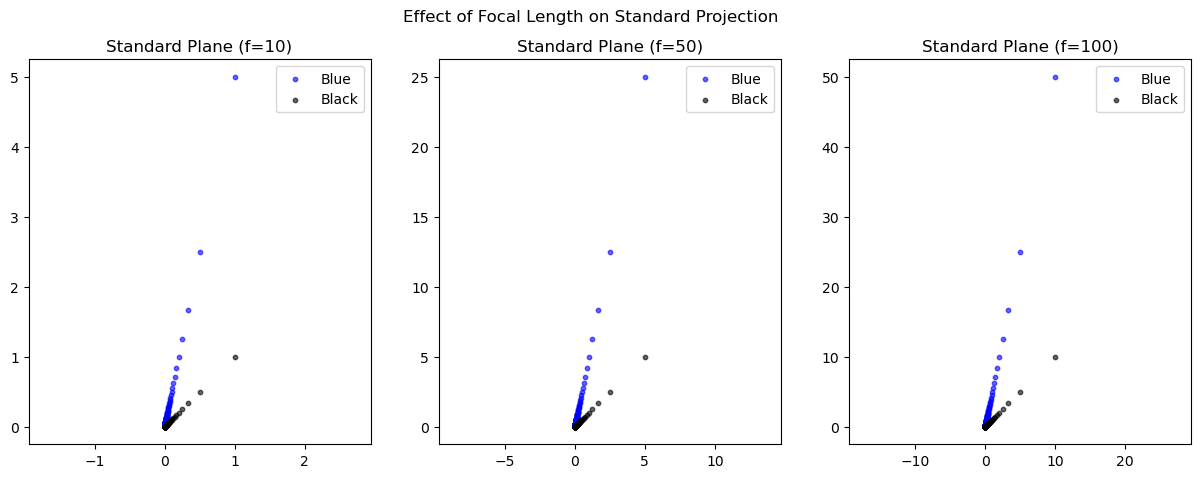

In [22]:
def project_standard(points, f):
    """
    Projects points onto a standard image plane Z = f.
    Uses similar triangles: x_proj = f * X / Z
    """
    points = np.array(points)
    X = points[:, 0]
    Y = points[:, 1]
    Z = points[:, 2]
    
    # Avoid division by zero
    Z = np.where(Z == 0, 1e-6, Z)
    
    # Projection formulas
    u = f * (X / Z)
    v = f * (Y / Z)
    
    # Return 2D coordinates (u, v) and the 3D intersection points
    # The 3D intersection point on the plane Z=f is (u, v, f)
    intersections_3d = np.column_stack([u, v, np.full_like(u, f)])
    return np.column_stack([u, v]), intersections_3d



# --- Task 1: Standard Plane with f = 10, 50, 100 ---
focal_lengths = [10, 50, 100]

plt.figure(figsize=(15, 5))
for i, f in enumerate(focal_lengths):
    # Project
    blue_2d, _ = project_standard(blue_points, f)
    black_2d, _ = project_standard(black_points, f)
    
    # Plot
    ax = plt.subplot(1, 3, i+1)
    ax.scatter(blue_2d[:, 0], blue_2d[:, 1], c='blue', label='Blue', s=10, alpha=0.6)
    ax.scatter(black_2d[:, 0], black_2d[:, 1], c='black', label='Black', s=10, alpha=0.6)
    ax.set_title(f"Standard Plane (f={f})")
    ax.axis('equal')
    ax.legend()

plt.suptitle("Effect of Focal Length on Standard Projection")
plt.savefig("Standard_plane")
plt.show()


### Projection with a Tilted Image Plane

In [23]:
def project_tilted(points, plane_coeffs):
    """
    Projects points onto a general plane ax + by + cz + d = 0.
    """
    points = np.array(points)
    a, b, c, d = plane_coeffs
    normal = np.array([a, b, c])
    
    projected_2d = []
    intersections_3d = []
    
    # Camera Center assumed at Origin (0,0,0)
    C = np.array([0, 0, 0])
    
    for P in points:
        # Vector V from Camera to Point P
        V = P - C 
        
        # Ray-Plane Intersection Parameter t
        # t = - (N.C + d) / (N.V)
        numerator = np.dot(normal, C) + d
        denominator = np.dot(normal, V)
        
        if abs(denominator) < 1e-6:
            continue # Ray is parallel to plane
            
        t = -numerator / denominator
        
        # Intersection Point I = C + t*V
        I = C + (t * V)
        intersections_3d.append(I)
        
        # For simple plotting, we use the global X, Y of the intersection
        projected_2d.append([I[0], I[1]])
        
    return np.array(projected_2d), np.array(intersections_3d)

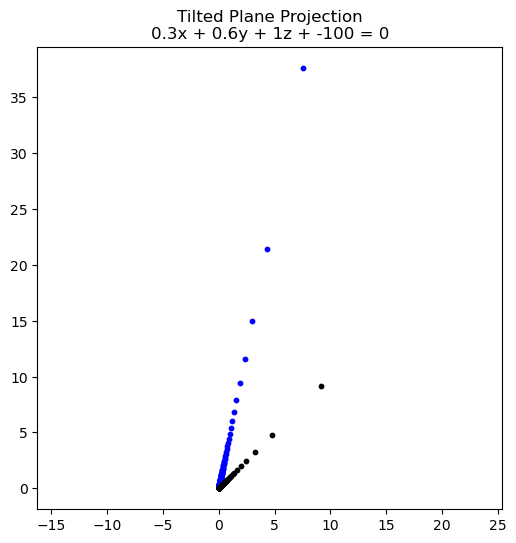

In [24]:
plane_coeffs = [0.3, 0.6, 1, -100]

tilted_blue_2d, tilt_blue_3d = project_tilted(blue_points, plane_coeffs)
tilted_black_2d, tilt_black_3d = project_tilted(black_points, plane_coeffs)

plt.figure(figsize=(6, 6))
plt.scatter(tilted_blue_2d[:, 0], tilted_blue_2d[:, 1], c='blue', s=10)
plt.scatter(tilted_black_2d[:, 0], tilted_black_2d[:, 1], c='black', s=10)
plt.title(f"Tilted Plane Projection\n{plane_coeffs[0]}x + {plane_coeffs[1]}y + {plane_coeffs[2]}z + {plane_coeffs[3]} = 0")
plt.axis('equal')
plt.savefig("tilted ")
plt.show()

### Ideal Point Analysis (Standard Plane)

In [25]:
def analyze_distances(p1_3d, p2_3d, i1_3d, i2_3d, label):
    # Real World Distance
    dist_3d = np.linalg.norm(p1_3d - p2_3d)
    
    # Projection Plane Distance (Before pixel mapping)
    dist_proj = np.linalg.norm(i1_3d - i2_3d)
    
    print(f"--- {label} ---")
    print(f"Original 3D Distance:     {dist_3d:.4f}")
    print(f"Projected Plane Distance: {dist_proj:.4f}")
    print(f"Ratio (Proj/Orig):        {dist_proj/dist_3d:.4f}\n")

# Using Standard Projection (f=50) for this analysis
_, blue_ints = project_standard(blue_points, f=50)
_, black_ints = project_standard(black_points, f=50)

# First Black vs First Blue
p1 = black_points[0]
p2 = blue_points[0]
i1 = black_ints[0]
i2 = blue_ints[0]
analyze_distances(p1, p2, i1, i2, "First Black Point vs First Blue Point")

# Last Black vs Last Blue
p1_last = black_points[-1]
p2_last = blue_points[-1]
i1_last = black_ints[-1]
i2_last = blue_ints[-1]
analyze_distances(p1_last, p2_last, i1_last, i2_last, "Last Black Point vs Last Blue Point")

--- First Black Point vs First Blue Point ---
Original 3D Distance:     4.0000
Projected Plane Distance: 20.0000
Ratio (Proj/Orig):        5.0000

--- Last Black Point vs Last Blue Point ---
Original 3D Distance:     4.0000
Projected Plane Distance: 0.0000
Ratio (Proj/Orig):        0.0000



### Ideal Point Analysis (Tilted Plane)

In [26]:
import numpy as np

# Define your plane coefficients [a, b, c, d]
plane_coeffs = [0.3, 0.6, 1, -100]

# Get the 3D Intersections on the Tilted Plane
_, blue_ints = project_tilted(blue_points, plane_coeffs)
_, black_ints = project_tilted(black_points, plane_coeffs)

# Perform Analysis
# First Black vs First Blue
p1 = black_points[0]
p2 = blue_points[0]
i1 = black_ints[0]
i2 = blue_ints[0]

analyze_distances(p1, p2, i1, i2, "First Black Point vs First Blue Point")

# Last Black vs Last Blue
p1_last = black_points[-1]
p2_last = blue_points[-1]
i1_last = black_ints[-1]
i2_last = blue_ints[-1]

analyze_distances(p1_last, p2_last, i1_last, i2_last, "Last Black Point vs Last Blue Point")

--- First Black Point vs First Blue Point ---
Original 3D Distance:     4.0000
Projected Plane Distance: 32.9316
Ratio (Proj/Orig):        8.2329

--- Last Black Point vs Last Blue Point ---
Original 3D Distance:     4.0000
Projected Plane Distance: 0.0000
Ratio (Proj/Orig):        0.0000



### Part II Camera Simulation

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from plyfile import PlyData


def load_ply_to_xyz(filename):
    """Load a PLY file and return (N,3) numpy array."""
    plydata = PlyData.read(filename)
    vertex = plydata['vertex']
    points = np.vstack([vertex['x'], vertex['y'], vertex['z']]).T
    return points


#  Load data 
filename = "scene.ply"  

points = load_ply_to_xyz(filename)

In [28]:
object_center = np.mean(points, axis=0)
object_size = np.max(points) - np.min(points)
dist = object_size * 2.0

In [29]:
views = { #camera pose and rotation matrix 
    "Front":  (object_center + np.array([0, 0, dist]), np.array([0, 1, 0])),
    "Back":   (object_center + np.array([0, 0, -dist]), np.array([0, 1, 0])),
    "Left":   (object_center + np.array([-dist, 0, 0]), np.array([0, 1, 0])),
    "Right":  (object_center + np.array([dist, 0, 0]), np.array([0, 1, 0])),
    "Top":    (object_center + np.array([0, dist, 0]), np.array([0, 0, 1])),
    "Bottom": (object_center + np.array([0, -dist, 0]), np.array([0, 0, 1]))
}

In [30]:
def get_lookat_rotation(camera_center, target, world_up=np.array([0, 1, 0])):
    C = np.array(camera_center)
    T = np.array(target)
    U = np.array(world_up)

    # Forward (Z)
    forward = T - C
    forward = forward / np.linalg.norm(forward)

    # Right (X)
    right = np.cross(forward, U)
    if np.linalg.norm(right) < 1e-6:
        right = np.array([1, 0, 0])
    right = right / np.linalg.norm(right)

    # Down (Y)
    down = np.cross(forward, right)
    down = down / np.linalg.norm(down)

    # Rotation matrix
    R = np.vstack([right, down, forward])
    return R


In [31]:
def project_points(points_3d, K, R, C):
    """
    World → Camera → Image
    """
    # World → Camera
    points_world = points_3d.T
    points_centered = points_world - C.reshape(3, 1)
    points_cam = R @ points_centered

    Xc, Yc, Zc = points_cam

    # Keep points in front of camera
    valid = Zc > 0

    f = K[0, 0]
    cx = K[0, 2]
    cy = K[1, 2]

    u = f * (Xc[valid] / Zc[valid]) + cx
    v = f * (Yc[valid] / Zc[valid]) + cy

    return np.column_stack((u, v)), valid


In [32]:
# Camera intrinsics
f = 800
image_w, image_h = 1024, 1024 #image size 
cx, cy = image_w / 2, image_h / 2 # focal point 

K = np.array([
    [f, 0, cx],
    [0, f, cy],
    [0, 0, 1]
])

In [33]:
view_pairs = [
    ("Front", "Back"),
    ("Left", "Right"),
    ("Top", "Bottom")
]

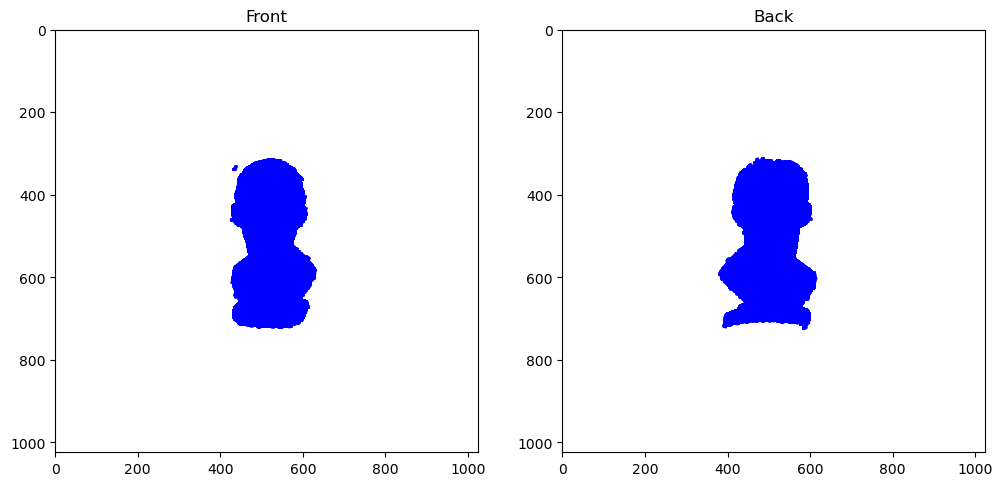

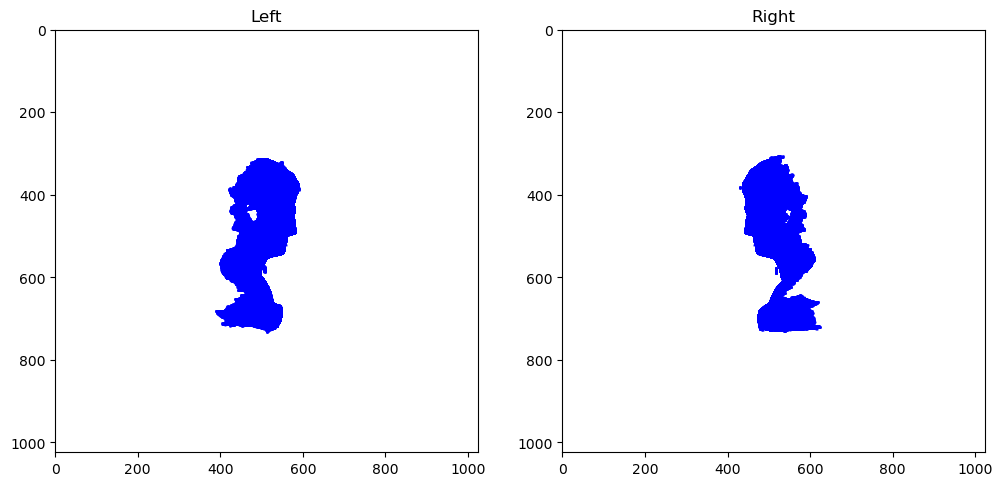

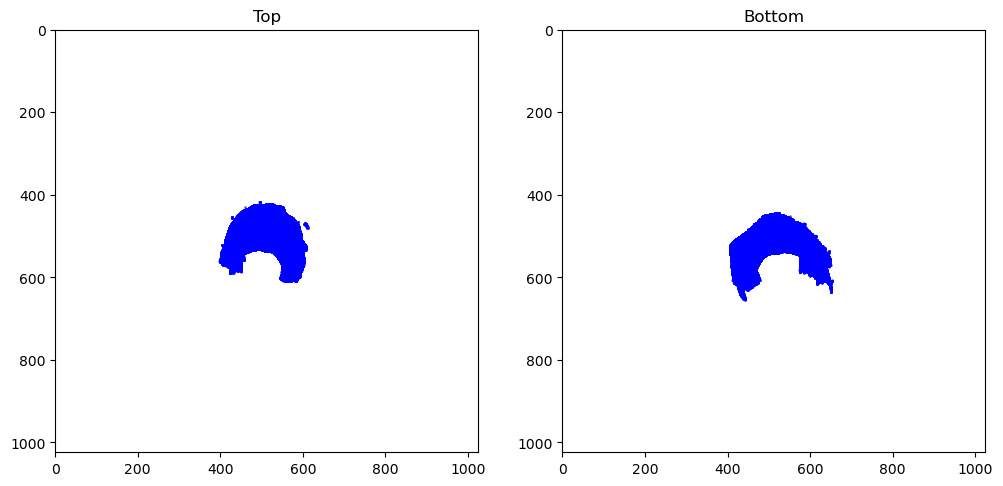

In [34]:
for left_name, right_name in view_pairs:

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    #  LEFT VIEW 
    C_left, up_left = views[left_name]
    R_left = get_lookat_rotation(C_left, object_center, up_left)
    uv_left, _ = project_points(points, K, R_left, C_left)

    axes[0].scatter(uv_left[:, 0], uv_left[:, 1], s=1, c='blue', alpha=0.5)
    axes[0].set_xlim(0, image_w)
    axes[0].set_ylim(image_h, 0)
    axes[0].set_aspect('equal')
    axes[0].set_title(left_name)
 

    #  RIGHT VIEW 
    C_right, up_right = views[right_name]
    R_right = get_lookat_rotation(C_right, object_center, up_right)
    uv_right, _ = project_points(points, K, R_right, C_right)

    axes[1].scatter(uv_right[:, 0], uv_right[:, 1], s=1, c='blue', alpha=0.5)
    axes[1].set_xlim(0, image_w)
    axes[1].set_ylim(image_h, 0)
    axes[1].set_aspect('equal')
    axes[1].set_title(right_name)
   

    #  SAVE 
    filename = f"views/{left_name.lower()}_{right_name.lower()}.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()


# Camera Simulation on a spectacles Case


In [35]:
new_filename = "mkoome_mesh.ply"  

points = load_ply_to_xyz(new_filename)

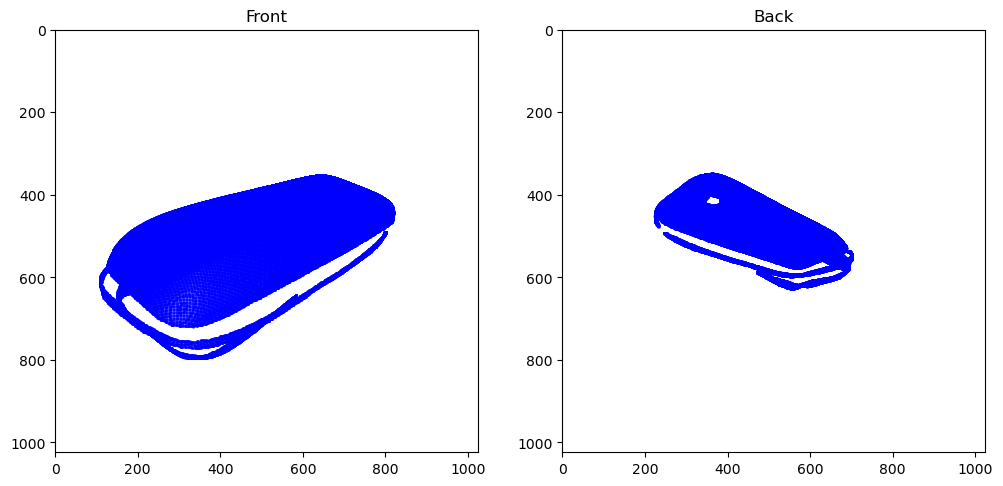

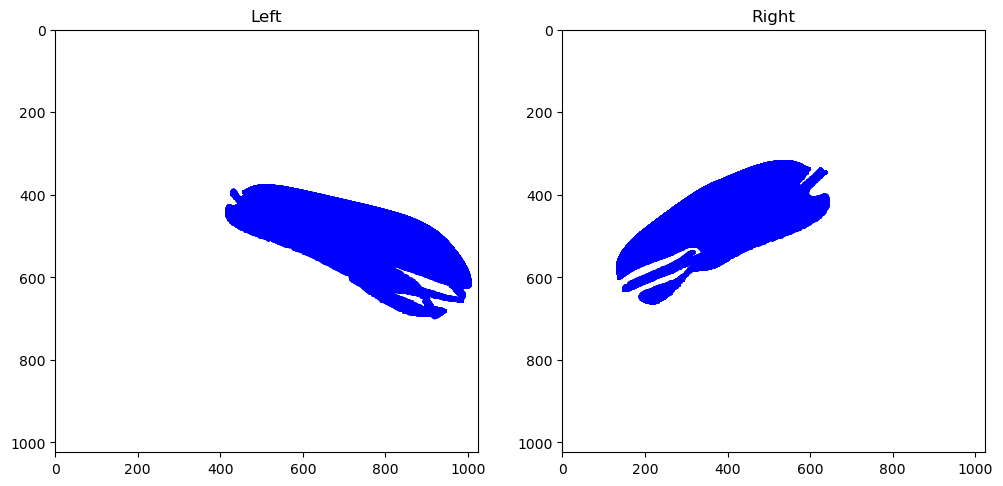

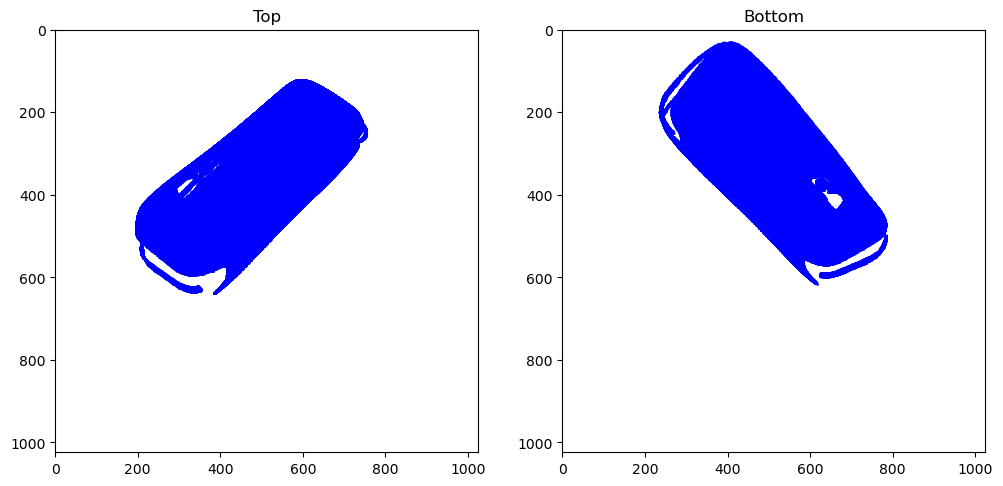

In [36]:
for left_name, right_name in view_pairs:

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    #  LEFT VIEW 
    C_left, up_left = views[left_name]
    R_left = get_lookat_rotation(C_left, object_center, up_left)
    uv_left, _ = project_points(points, K, R_left, C_left)

    axes[0].scatter(uv_left[:, 0], uv_left[:, 1], s=1, c='blue', alpha=0.5)
    axes[0].set_xlim(0, image_w)
    axes[0].set_ylim(image_h, 0)
    axes[0].set_aspect('equal')
    axes[0].set_title(left_name)
 

    #  RIGHT VIEW 
    C_right, up_right = views[right_name]
    R_right = get_lookat_rotation(C_right, object_center, up_right)
    uv_right, _ = project_points(points, K, R_right, C_right)

    axes[1].scatter(uv_right[:, 0], uv_right[:, 1], s=1, c='blue', alpha=0.5)
    axes[1].set_xlim(0, image_w)
    axes[1].set_ylim(image_h, 0)
    axes[1].set_aspect('equal')
    axes[1].set_title(right_name)
   

    #  SAVE 
    filename = f"views/{left_name.lower()}_{right_name.lower()}_2.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()


# Additional Extension 

In [37]:
INPUT_PLY = "scene.ply"     

IMAGE_W, IMAGE_H = 800, 800
NUM_SAMPLE = 200_000     # subsample number for speed (cap)
F = 800                  # focal length in pixels
FRAMES_DIR = "orbit_frames"
NUM_FRAMES = 120
ORBIT_RADIUS = 3.0       # distance multiplier around object center
ORBIT_HEIGHT = 0.5       # y-offset of orbit (vertical)
COLORMAP = "viridis"



def load_ply_xyz(path):
    ply = PlyData.read(path)
    v = ply['vertex']
    pts = np.vstack([v['x'], v['y'], v['z']]).T
    return np.asarray(pts)


def get_lookat_rotation(camera_center, target, world_up=(0, 1, 0)):
    """
    Compute rotation matrix R (3x3) such that:
      P_cam = R @ (P_world - C)
    where the camera z-axis (forward) points towards (target - C).
    Returns R with rows = [right, down, forward] to match convention:
    P_cam = R @ (P_world - C) (row-wise axes).
    """
    C = np.asarray(camera_center, dtype=float)
    T = np.asarray(target, dtype=float)
    U = np.asarray(world_up, dtype=float)

    forward = T - C
    norm_f = np.linalg.norm(forward)
    if norm_f < 1e-9:
        raise ValueError("Camera center coincides with target.")
    forward = forward / norm_f

    right = np.cross(forward, U)
    if np.linalg.norm(right) < 1e-9:
        # forward parallel to up: choose arbitrary right
        if abs(forward[1]) > 0.9:
            right = np.cross(forward, [1, 0, 0])
        else:
            right = np.cross(forward, [0, 1, 0])
    right = right / np.linalg.norm(right)

    down = np.cross(forward, right)
    down = down / np.linalg.norm(down)

    # Rotation matrix rows: right, down, forward
    R = np.vstack([right, down, forward])
    return R


def project_points(points, K, R, C, mode="perspective"):
    """
    Project Nx3 points into image using intrinsics K and extrinsics (R, C).
    mode: "perspective" or "orthographic"
    Returns:
      uv (M,2) pixel coordinates, depths Zc (M,), mask (N,) boolean for kept points
    """
    P = np.asarray(points, dtype=float)
    # world -> camera
    Pc = (R @ (P - C).T).T  # (N,3)
    Xc = Pc[:, 0]; Yc = Pc[:, 1]; Zc = Pc[:, 2]

    # valid points in front of camera
    mask = Zc > 1e-9
    if mask.sum() == 0:
        return np.zeros((0, 2)), np.zeros((0,)), mask

    Xc_valid = Xc[mask]; Yc_valid = Yc[mask]; Zc_valid = Zc[mask]

    if mode == "perspective":
        x = Xc_valid / Zc_valid
        y = Yc_valid / Zc_valid
    elif mode == "orthographic":
        x = Xc_valid
        y = Yc_valid
    else:
        raise ValueError("Unknown projection mode")

    # apply intrinsics (assume K = [[f,0,cx],[0,f,cy],[0,0,1]])
    homog = np.stack([x, y, np.ones_like(x)], axis=0)  # (3,M)
    uv = (K @ homog).T[:, :2]

    return uv, Zc_valid, mask


def make_intrinsics(f, w, h):
    cx, cy = w/2.0, h/2.0
    return np.array([[f, 0.0, cx],
                     [0.0, f, cy],
                     [0.0, 0.0, 1.0]])

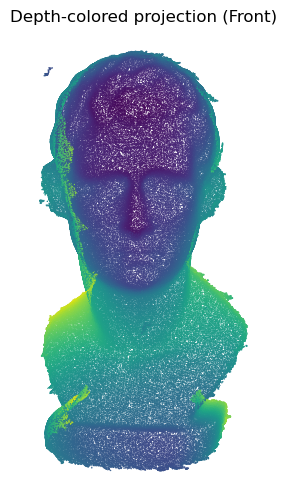

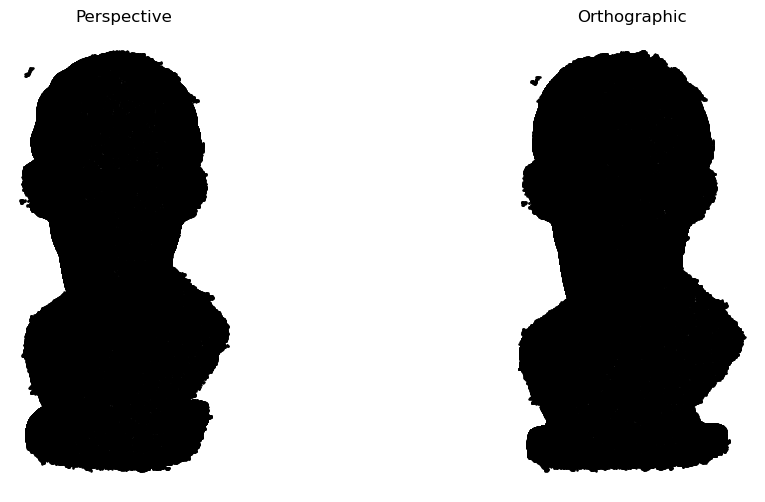

Generating orbit frames into orbit_frames
Saved example comparison to perspective_vs_orthographic.png


In [38]:
if __name__ == "__main__":
        
    points = load_ply_xyz(INPUT_PLY)


    # subsample if huge
    N = points.shape[0]
    if N > NUM_SAMPLE:
        idx = np.random.choice(N, NUM_SAMPLE, replace=False)
        points = points[idx, :]

    # center and scale (optional)
    object_center = points.mean(axis=0)
    points = points - object_center  # center at origin for nicer orbit
    
    #  scale to unit sphere for stable orbit radius
    max_range = np.max(np.linalg.norm(points, axis=1))
    if max_range > 0:
        points = points / max_range

    # Intrinsics
    K = make_intrinsics(F, IMAGE_W, IMAGE_H)

    # Choose a canonical camera for single-frame displays:
    C_front = np.array([0.0, 0.0, 3.0])   # front
    up_world = np.array([0.0, 1.0, 0.0])

    #  Depth-colored single view
    R_front = get_lookat_rotation(C_front, np.array([0.0, 0.0, 0.0]), up_world)
    uv, Zc, _ = project_points(points, K, R_front, C_front, mode="perspective")
    if uv.shape[0] == 0:
        print("No points in front of camera for the front view.")
    else:
        z_norm = (Zc - Zc.min()) / (Zc.max() - Zc.min())
        plt.figure(figsize=(6, 6))
        plt.scatter(uv[:, 0], uv[:, 1], s=0.8, c=z_norm, cmap=COLORMAP, linewidths=0)
        plt.gca().invert_yaxis()
        plt.title("Depth-colored projection (Front)")
        plt.axis("off")
        plt.gca().set_aspect("equal", adjustable="box")
        plt.savefig('Depth_color')
        plt.show()

    #  Perspective vs Orthographic comparison 
    R = R_front
    uv_p, _, _ = project_points(points, K, R, C_front, mode="perspective")
    uv_o, _, _ = project_points(points, K, R, C_front, mode="orthographic")

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].scatter(uv_p[:, 0], uv_p[:, 1], s=0.6, c='black')
    axes[0].set_title("Perspective")
    axes[0].invert_yaxis(); axes[0].axis("off"); axes[0].set_aspect("equal")

    axes[1].scatter(uv_o[:, 0], uv_o[:, 1], s=0.6, c='black')
    axes[1].set_title("Orthographic")
    axes[1].invert_yaxis(); axes[1].axis("off"); axes[1].set_aspect("equal")

    plt.show()

    #  Orbit animation frames generation 
    os.makedirs(FRAMES_DIR, exist_ok=True)
    angles = np.linspace(0, 2 * math.pi, NUM_FRAMES, endpoint=False)
    radius = ORBIT_RADIUS
    height = ORBIT_HEIGHT

    print("Generating orbit frames into", FRAMES_DIR)
    for i, theta in enumerate(angles):
        # camera center on a horizontal circle (x,z), with slight height offset
        C = np.array([radius * math.cos(theta), height, radius * math.sin(theta)])
        R = get_lookat_rotation(C, np.array([0.0, 0.0, 0.0]), up_world)

        uv, Zc, mask = project_points(points, K, R, C, mode="perspective")
        if uv.shape[0] == 0:
            # nothing to render for this frame 
            continue

        z_norm = (Zc - Zc.min()) / (Zc.max() - Zc.min())

        plt.figure(figsize=(6, 6))
        plt.scatter(uv[:, 0], uv[:, 1], s=0.8, c=z_norm, cmap=COLORMAP, linewidths=0)
        plt.gca().invert_yaxis()
        plt.axis("off")
        plt.gca().set_aspect("equal", adjustable="box")

        frame_path = os.path.join(FRAMES_DIR, f"frame_{i:03d}.png")
        # plt.savefig(frame_path, dpi=160, bbox_inches='tight', pad_inches=0)
        plt.close()


    #  save one example pair image of Perspective vs Orthographic for report:
    out_pair = "perspective_vs_orthographic.png"
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].scatter(uv_p[:, 0], uv_p[:, 1], s=0.6, c='black')
    axes[0].set_title("Perspective")
    axes[0].invert_yaxis(); axes[0].set_aspect("equal")
    axes[1].scatter(uv_o[:, 0], uv_o[:, 1], s=0.6, c='black')
    axes[1].set_title("Orthographic")
    axes[1].invert_yaxis(); axes[1].set_aspect("equal")
    plt.savefig(out_pair, dpi=200, bbox_inches='tight', pad_inches=0)
    plt.close()
    print("Saved example comparison to", out_pair)




### PART III Image Demosaicing

Bayer Image with missing pixels


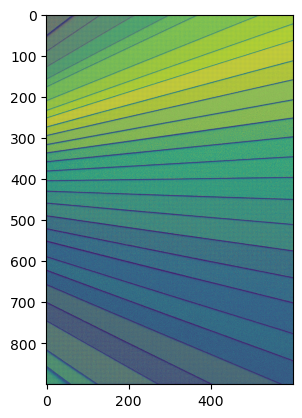

In [39]:
with open('data.pkl', 'rb') as file:
    loaded_data = pickle.load(file)
print("Bayer Image with missing pixels")
plt.imshow(loaded_data)
plt.savefig('original')

In [40]:
loaded_data

array([[248.,  43., 249., ..., 229., 238., 228.],
       [ 46., 117.,  47., ..., 113., 230., 112.],
       [253.,  43., 255., ..., 231., 240., 231.],
       ...,
       [163.,  41., 156., ...,  96.,  40., 101.],
       [214., 150., 211., ...,  28., 139.,  32.],
       [152.,  34., 153., ..., 104.,  41., 105.]])

In [41]:
#TODO Complete the function  below to convert bayer to rgb using bilinear interpolation
#RG
#GB
import numpy as np

def bayer2rgb(image, height, width):
    im_color = np.zeros([height, width, 3])
    for y in range(height):
        for x in range(width):
            # Row 0: R G R G ...
            # Row 1: G B G B ...
            
            #  RED PIXEL (Even Row, Even Column)
            if (y % 2 == 0) and (x % 2 == 0):
                # Red is known
                im_color[y, x, 0] = image[y, x]
                
                # Green (Average of Top, Bottom, Left, Right)
                g_neighbors = []
                if y > 0: g_neighbors.append(image[y-1, x])        # Top
                if y < height-1: g_neighbors.append(image[y+1, x]) # Bottom
                if x > 0: g_neighbors.append(image[y, x-1])        # Left
                if x < width-1: g_neighbors.append(image[y, x+1])  # Right
                im_color[y, x, 1] = sum(g_neighbors) / len(g_neighbors) if g_neighbors else 0
                
                # Blue (Average of 4 Diagonals)
                b_neighbors = []
                if y > 0 and x > 0: b_neighbors.append(image[y-1, x-1])             # Top-Left
                if y > 0 and x < width-1: b_neighbors.append(image[y-1, x+1])       # Top-Right
                if y < height-1 and x > 0: b_neighbors.append(image[y+1, x-1])      # Bottom-Left
                if y < height-1 and x < width-1: b_neighbors.append(image[y+1, x+1])# Bottom-Right
                im_color[y, x, 2] = sum(b_neighbors) / len(b_neighbors) if b_neighbors else 0

            #  GREEN PIXEL in Red Row (Even Row, Odd Column) 
            elif (y % 2 == 0) and (x % 2 == 1):
                # Green is known
                im_color[y, x, 1] = image[y, x]
                
                # Red (Average of Left and Right)
                r_neighbors = []
                if x > 0: r_neighbors.append(image[y, x-1])
                if x < width-1: r_neighbors.append(image[y, x+1])
                im_color[y, x, 0] = sum(r_neighbors) / len(r_neighbors) if r_neighbors else 0
                
                # Blue (Average of Top and Bottom)
                b_neighbors = []
                if y > 0: b_neighbors.append(image[y-1, x])
                if y < height-1: b_neighbors.append(image[y+1, x])
                im_color[y, x, 2] = sum(b_neighbors) / len(b_neighbors) if b_neighbors else 0

            #  GREEN PIXEL in Blue Row (Odd Row, Even Column) 
            elif (y % 2 == 1) and (x % 2 == 0):
                # Green is known
                im_color[y, x, 1] = image[y, x]
                
                # Red (Average of Top and Bottom)
                r_neighbors = []
                if y > 0: r_neighbors.append(image[y-1, x])
                if y < height-1: r_neighbors.append(image[y+1, x])
                im_color[y, x, 0] = sum(r_neighbors) / len(r_neighbors) if r_neighbors else 0
                
                # Blue (Average of Left and Right)
                b_neighbors = []
                if x > 0: b_neighbors.append(image[y, x-1])
                if x < width-1: b_neighbors.append(image[y, x+1])
                im_color[y, x, 2] = sum(b_neighbors) / len(b_neighbors) if b_neighbors else 0

            # BLUE PIXEL (Odd Row, Odd Column) 
            elif (y % 2 == 1) and (x % 2 == 1):
                # Blue is known
                im_color[y, x, 2] = image[y, x]
                
                # Green (Average of Top, Bottom, Left, Right)
                g_neighbors = []
                if y > 0: g_neighbors.append(image[y-1, x])
                if y < height-1: g_neighbors.append(image[y+1, x])
                if x > 0: g_neighbors.append(image[y, x-1])
                if x < width-1: g_neighbors.append(image[y, x+1])
                im_color[y, x, 1] = sum(g_neighbors) / len(g_neighbors) if g_neighbors else 0
                
                # Red (Average of 4 Diagonals)
                r_neighbors = []
                if y > 0 and x > 0: r_neighbors.append(image[y-1, x-1])
                if y > 0 and x < width-1: r_neighbors.append(image[y-1, x+1])
                if y < height-1 and x > 0: r_neighbors.append(image[y+1, x-1])
                if y < height-1 and x < width-1: r_neighbors.append(image[y+1, x+1])
                im_color[y, x, 0] = sum(r_neighbors) / len(r_neighbors) if r_neighbors else 0

    return im_color

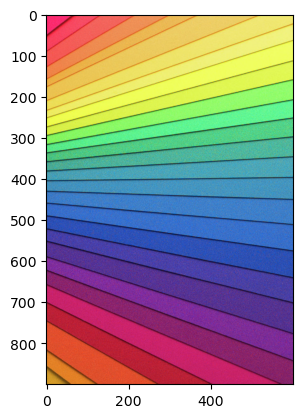

In [42]:
color_data = np.zeros([512,768,3])

color_data = bayer2rgb(loaded_data,loaded_data.shape[0], loaded_data.shape[1])

img1 = Image.fromarray(color_data.astype(np.uint8))
plt.imshow(img1)
plt.savefig('Bilinear_transformation')

Here is the result for your reference in evaluating your performance
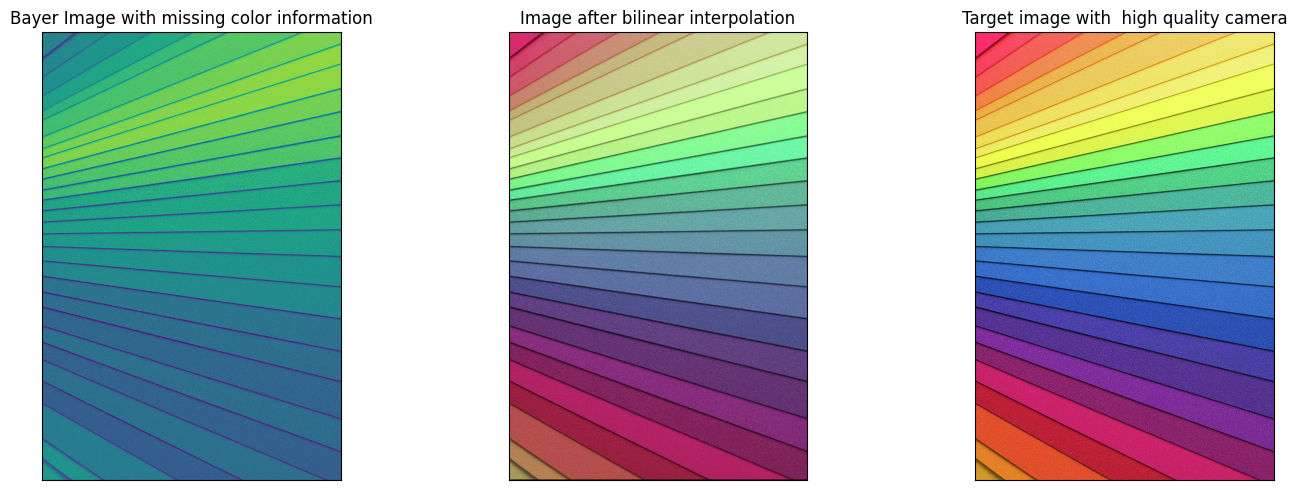